In [37]:
from scipy import misc, ndimage
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline

In [2]:
jpg_file = "../data/ADEChallengeData2016/images/training/ADE_train_00008252.jpg"
png_file = "../data/ADEChallengeData2016/annotations/training/ADE_train_00008252.png"

In [4]:
jpgpic = misc.imread(jpg_file)
pngpic = misc.imread(png_file)

In [5]:
jpgpic.shape

(234, 350, 3)

In [6]:
pngpic.shape

(234, 350)

In [12]:
t1 = misc.imresize(pngpic, (400, 400))
t2 = ndimage.zoom(pngpic, (1.*400/234, 1.*400/350), order=1, prefilter=False)

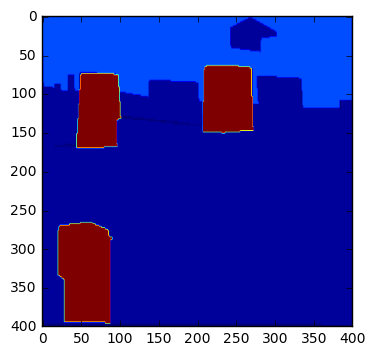

In [17]:
plt.imshow(t1)

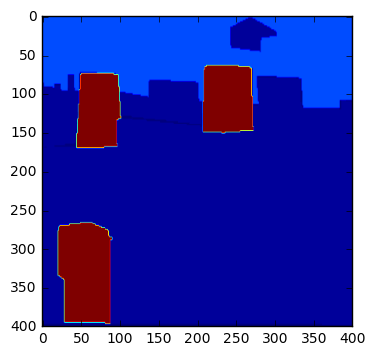

In [18]:
plt.imshow(t2)

In [20]:
len(t1.shape)

2

In [22]:
len(jpgpic.shape)

3

In [23]:
import numpy as np

In [31]:
np.random.choice([False, True])

False

In [33]:
t1

array([[ 0,  0,  0, ..., 17, 14,  0],
       [ 6,  6,  6, ..., 17, 14,  0],
       [16, 16, 16, ..., 17, 14,  0],
       ..., 
       [ 0,  0,  0, ...,  2,  2,  2],
       [ 0,  0,  0, ...,  1,  1,  1],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

In [34]:
t2

array([[ 0,  0,  0, ..., 17, 15,  0],
       [10, 10, 10, ..., 17, 15,  0],
       [17, 17, 17, ..., 17, 15,  0],
       ..., 
       [ 0,  0,  0, ...,  2,  2,  2],
       [ 0,  0,  0, ...,  1,  1,  1],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

In [35]:
t2 == 10

array([[False, False, False, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

In [91]:
def _get_y_batch(img_list, shapes = (473, 473), n_class=150):
    '''
    :param img_list: a list of rgb or gray image
    :param shapes: the size of batch image
    :return: img_batch n_img x height x width x nchanel
    '''
    batch_size = len(img_list)
    img_batch = np.zeros((batch_size, shapes[0], shapes[1], n_class))
    ## Read image into batches
    for i_c in range(batch_size):
        input_name = img_list[i_c]
        img = misc.imread(input_name)
        cl = np.unique(img)
        cl = cl[cl > 0]
        img = misc.imresize(img, (shapes[0], shapes[1]))
        for clc in cl:
            cmask = (img == clc).astype(int)
            img_batch[i_c, :, :, clc - 1] = cmask
    return img_batch.astype("float16")
img_list = [png_file]
imgbatch = _get_y_batch(img_list)

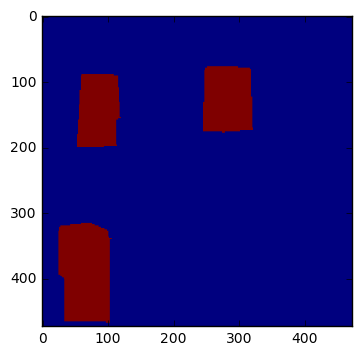

In [92]:
plt.imshow(imgbatch[0, :, :, 84])

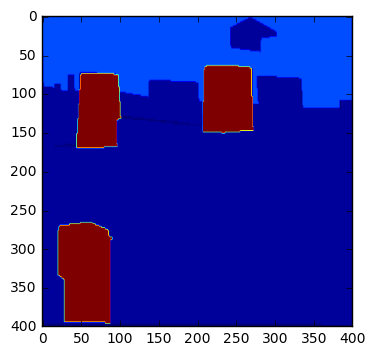

In [80]:
plt.imshow(t1)